In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1 , 4 , 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7623311844057112


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

In [131]:
X_poly_test = poly_reg.transform(X_test)
y_pred_1 = lin_reg_2.predict(X_poly_test)

In [132]:
r2 = r2_score(y_test, y_pred_1)
print(f'R² Score poly reg: {r2}')

R² Score poly reg: 0.8807234133111792


In [133]:
from sklearn.ensemble import RandomForestRegressor
reg_1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
reg_1.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [134]:
y_pred_2 = reg_1.predict(X_test)

In [135]:
r2 = r2_score(y_test, y_pred_2)
print(f'R² Score random forest: {r2}')

R² Score random forest: 0.9706388212725982


In [136]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [137]:
y_pred_3 = regressor.predict(X_test)

In [138]:
r2 = r2_score(y_test, y_pred_3)
print(f'R² Score dission tree: {r2}')

R² Score dission tree: 0.9967338847929837


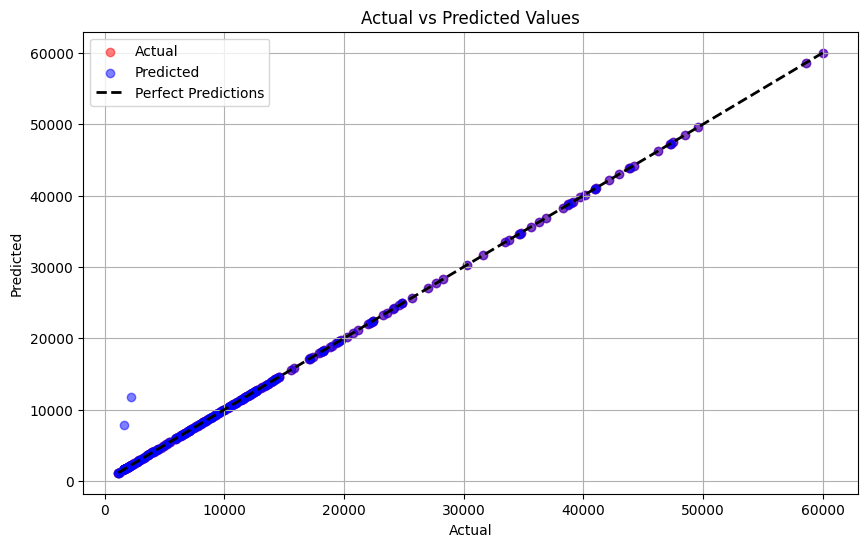

In [140]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)

plt.scatter(y_test, y_pred_3, color='blue', label='Predicted', alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Predictions')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

In [142]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()


X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


y_train = sc_y.fit_transform(y_train).flatten()
y_test = sc_y.transform(y_test).flatten()

In [143]:
from sklearn.svm import SVR
reg_ = SVR(kernel = 'rbf')
reg_.fit(X, y)

SVR()

In [144]:
y_pred_4 = regressor.predict(X_test)

In [145]:
r2 = r2_score(sc_y.inverse_transform(y_test.reshape(-1, 1)), sc_y.inverse_transform(y_pred_4.reshape(-1, 1)))
print(f'R² Score svm: {r2}')

R² Score svm: -51053535.45399783
